# Plot your results

In [1]:
import orsa
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set(style = 'white')
mpl.rc('xtick.minor', visible = True)
mpl.rc('ytick.minor', visible = True)
mpl.rc('xtick', direction='in', top=True, bottom = True)
mpl.rc('ytick', direction='in', right=True, left = True)

print(orsa.__version__)

0.8.5


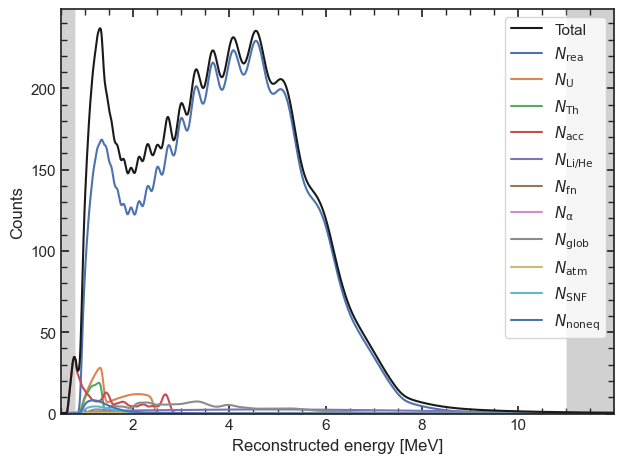

In [2]:
model = orsa.model.read_json('inputs/test_model.json')
model.exposure = 6*365.25
model

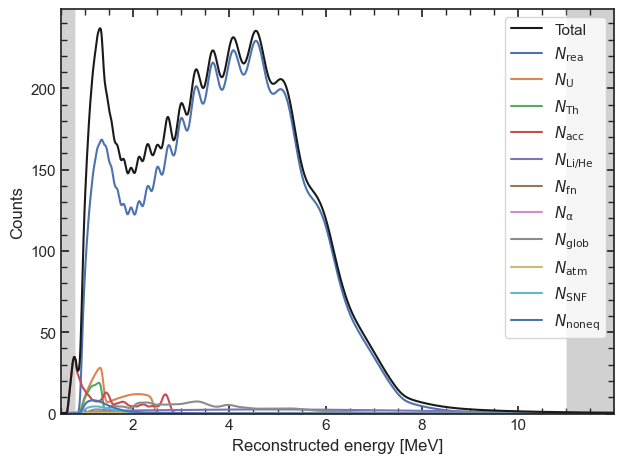

In [3]:
model

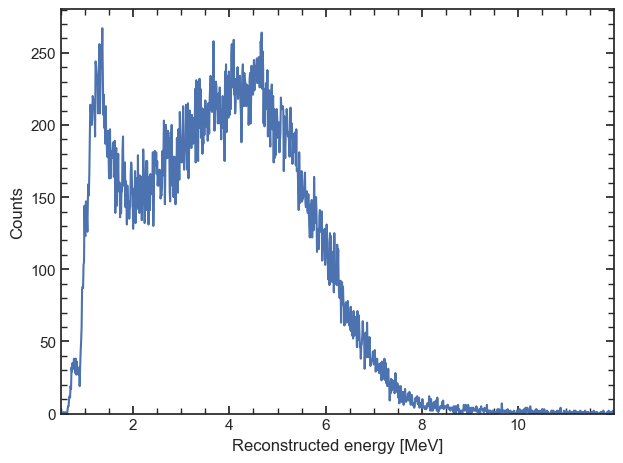

In [4]:
data = model.get_spectrum(asimov = False)
data

In [5]:
for param in model.detector_parameters:
    model.detector_parameters[param].fixed = True

for param in model.core_parameters:
    model.core_parameters[param].fixed = True

for param in model.normalization_parameters:
    if model.normalization_parameters[param].label not in ['rea', 'U', 'Th']:
        model.normalization_parameters[param].fixed = True

model.parameters['rho'].fixed = True

In [6]:
init_model = model.copy()
model.use_shape_uncertainty = False
cf = orsa.probability.CostFunction(ll=orsa.probability.ll_binned, model=model, data=data, ll_args = dict())
true_values = cf.get_params_to_fit()[0]
res = orsa.fit.minuit(cf)
res.true_values = true_values

Cost function parsed as LogLikelihood-like


In [7]:
res.obj

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6931                       │              Nfcn = 190              │
│ EDM = 0.000156 (Goal: 0.0002)    │            time = 5.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name    │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼─────────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ dm2_21: │ 75.40e-6  │  0.24e-6  │            │            │         │         │       │
│ 1 │ dm2_31: │ 2.536e-3  │ 0.004e-3  │            │            │         │         │       │
│ 2 │ s2_12:  │  0.3080   │  0.0018   │            │            │         │         │       │
│ 3 │ s2_13:  │  0.0199   │  0.0024   │            │            │         │         │       │
│ 4 │ rea:    │  290.3e3  │   2.3e3   │            │            │         │         │       │
│ 5 │ U:      │   1.9e3   │   0.5e3   │            │            │         │         │       │
│ 6 │ Th:     │  0.54e3   │  0.18e3   │            │            │         │         │       │
└───┴─────────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│         │         dm2_21:         dm2_31:          s2_12:          s2_13:            rea:              U:             Th: │
├─────────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ dm2_21: │        5.89e-14       -0.01e-12     -156.32e-12      -28.03e-12 192.37012076e-6 -87.56214863e-6  19.01784294e-6 │
│ dm2_31: │       -0.01e-12           2e-11        0.190e-9        0.092e-9   129.908821e-6    33.746641e-6   -11.263648e-6 │
│  s2_12: │     -156.32e-12        0.190e-9        3.16e-06         -0.1e-6       1.8336634     471.9102e-3    -189.9924e-3 │
│  s2_13: │      -28.03e-12        0.092e-9         -0.1e-6        5.84e-06        2.843681       33.057e-3        7.563e-3 │
│    rea: │ 192.37012076e-6   129.908821e-6       1.8336634        2.843681        5.46e+06         -0.17e6        -0.034e6 │
│      U: │ -87.56214863e-6    33.746641e-6     471.9102e-3       33.057e-3         -0.17e6        2.14e+05        -0.067e6 │
│     Th: │  19.01784294e-6   -11.263648e-6    -189.9924e-3        7.563e-3        -0.034e6        -0.067e6        3.34e+04 │
└─────────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘

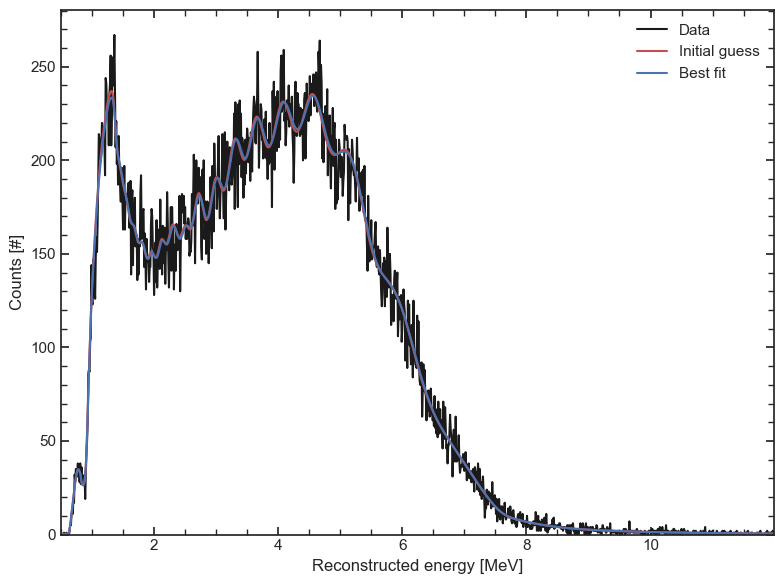

In [8]:
fig, ax = plt.subplots(figsize = (8,6))
sp_initial = init_model.get_spectrum(asimov=True)
sp_final = model.get_spectrum(asimov=True)

ax.plot(data.E, data.counts, 'k-', label = 'Data')
ax.plot(sp_initial.E, sp_initial.counts, 'r-', label = 'Initial guess')
ax.plot(sp_final.E, sp_final.counts, 'b-', label = 'Best fit')
ax.set_xlim(model.E_eval.min(), model.E_eval.max())
ax.set_ylim(bottom = False)
ax.set_xlabel('Reconstructed energy [MeV]')
ax.set_ylabel('Counts [#]')

ax.legend(frameon = False)
fig.tight_layout()

(0.0, 280.0)

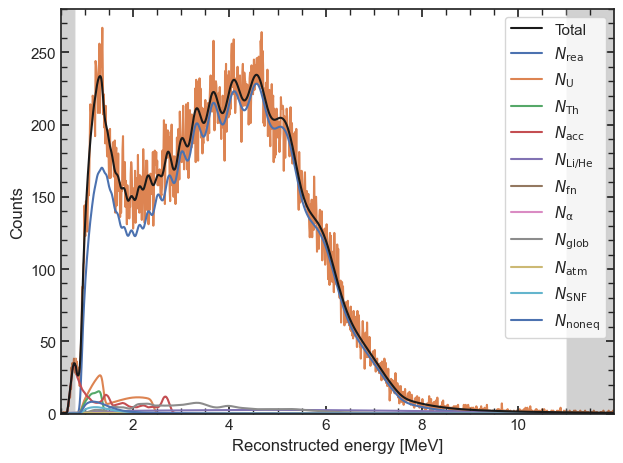

In [9]:
fig, ax = model.get_fig()
ax.plot(data.E, data.counts, zorder = -10)
ax.set_ylim(top = 280)

c:\Users\metal\miniconda3\envs\orsa\Lib\site-packages\orsa\fit\minimizers.py:152: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  samples = np.random.multivariate_normal(
100%|██████████| 1000/1000 [00:31<00:00, 31.98it/s]


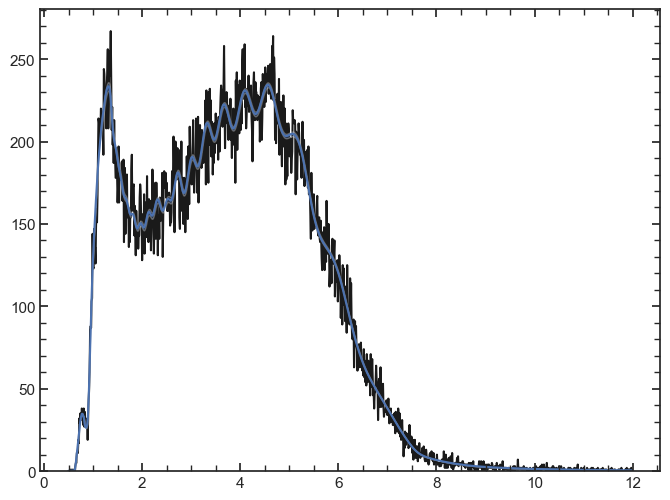

In [10]:
res.get_samples(10000)
orsa.plot.plot_ci(res, samples=1000, plot_data=True, n_sigmas=[1]);

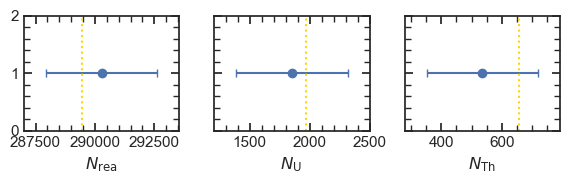

In [11]:
orsa.plot.bars(res, true_values=True, which = ['rea:', 'U:', 'Th:']);

Removed no burn in


c:\Users\metal\miniconda3\envs\orsa\Lib\site-packages\orsa\plot\plot.py:201: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  g.subplots[i, j].scatter(


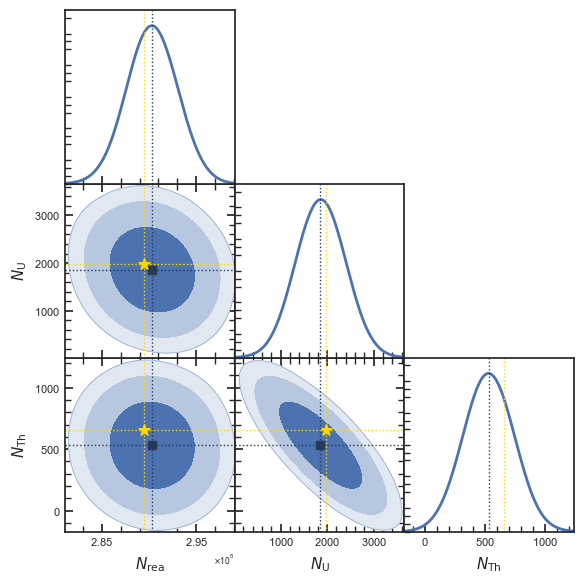

In [12]:
orsa.plot.corner(res, true_values=True, which = ['rea:', 'U:', 'Th:']);

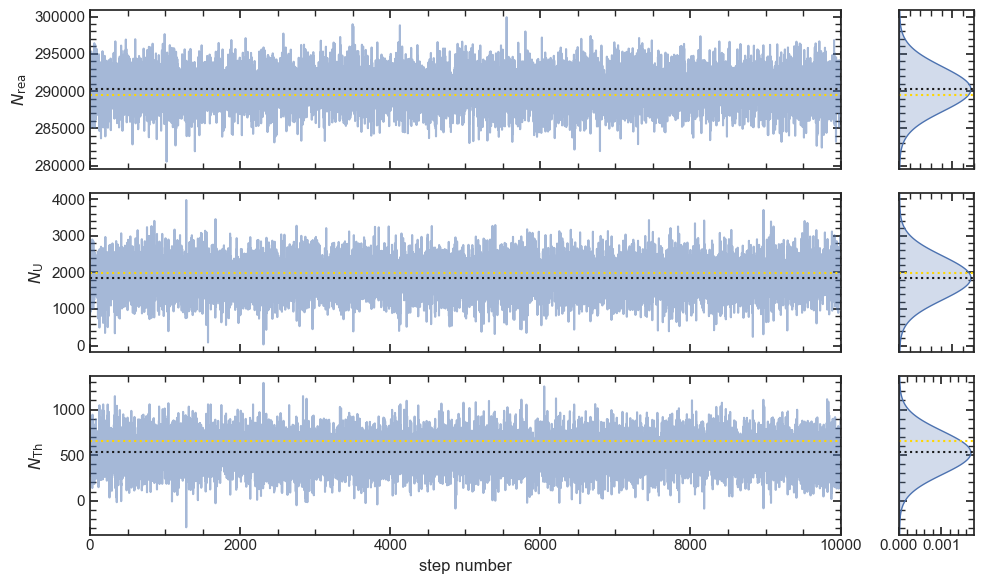

In [13]:
orsa.plot.chains(res, which = ['rea:', 'U:', 'Th:'], cut = None, c = None, ax = None, true_values = True);

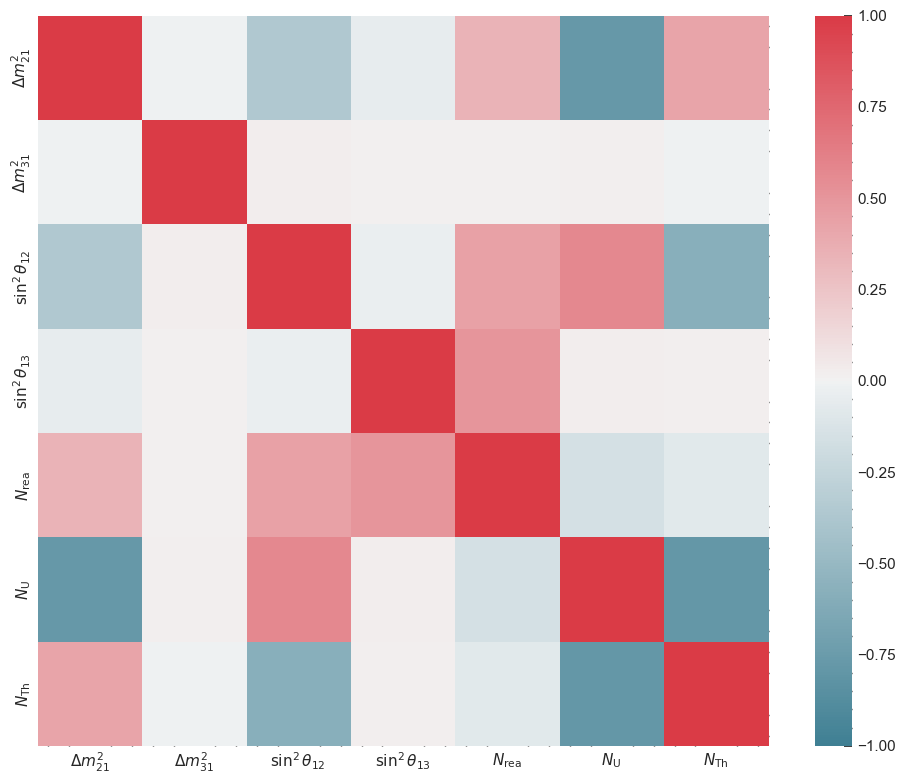

In [14]:
# parse_labels(res, which = ['rea', 'U', 'Th'])
fig, ax = plt.subplots(figsize = (10,8))
ax.set_aspect('equal')
orsa.plot.correlation(res, ax = ax, which = None)#['rea', 'U', 'Th'])
fig.tight_layout()